In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy,sys,os
import datetime as dtm
import matplotlib as mpl
import matplotlib.dates as mpd, pytz
import pylab as plt
import math,random
#
import multiprocessing as mpp
import json
import pickle
#
import cartopy
#
import nETAS_compute
import nETAS_mapper
import contours2kml
from yodiipy import ANSStools as atp


comcat not available. consider installing comcat for improved catalog operations; see https://github.com/usgs/libcomcat


#### TODDO: First, looks like the ANSS catalog code needs to be refised.

In [3]:
#
n_cpu = mpp.cpu_count()
# some eq parameters:
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
#
t0 = dtm.datetime.now(pytz.timezone('UTC'))
t_ms = t0
#
# sacramento:
lat0 = 38.5816
lon0 = -121.4944
ll_sacramento = (lon0, lat0)
#
d_lat=5.
d_lon=5.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#
to_dt = t0
#
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt-dtm.timedelta(days=10), 't_future':to_dt ,
               'lats': lats, 'p_cat': 1.1, 'b1': 1.0, 'mc': 2.5, 'q_cat': 1.5,
               'p_etas':1.1, 'q_etas':1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':1.5,
            'etas_range_factor':50.0, 'ab_ratio_expon':.25 }
#eq_prams.update({'mc':3.0, 'd_lat':.25, 'd_lon':.25})
#
event_name = 'NorCal_general'
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name, to_dt)
#
if not os.path.isdir(f_path):
    f_path = os.path.join(os.environ['HOME'], 'etas/{}/etas_{}'.format(event_name, to_dt))

f_root = f'etas_{event_name}_2021_07'

In [4]:
CC = atp.ANSS_Comcat_catalog(fetch_data=False)
#tt = atp.ANSS_Comcat_catalog.get_anss_datetime()


In [5]:
tt = CC.get_anss_datetime('2022-10-11T04:21:32')
print('tt: ', tt)

tt:  2022-10-11 04:21:03+00:00


In [20]:
print('*** ', atp.anssDateStr(x=dtm.datetime.now(pytz.timezone('UTC')), delim_dt='/', delim_tm=':',
                             dt_tm_sep='T'))
print('*** ', CC.anss_comcat_DateStr(delim_dt='-', delim_tm=':', dt_tm_sep='T'))

***  2023/01/14T19:24:53
***  2023-01-14T19:22:37


In [ ]:
mycat = atp.cat_from_anss_comcat(lat=[35., 45.], lon=[-126., -121.], minMag=3.0, 
                                 dates0=[dtm.datetime(2022,10,1, tzinfo=pytz.timezone('UTC')),
                                         dtm.datetime(2022,12,20, tzinfo=pytz.timezone('UTC'))],
                                fout=None, rec_array=True, verbose=True)


In [24]:
print('** ', mycat.url_str)

AttributeError: 'NoneType' object has no attribute 'url_str'

In [50]:
mycat = None
mycat = atp.cat_from_anss_comcat(lon=lons, lat=lats, minMag=eq_prams['mc'],
                        dates0=[dtm.datetime.now(pytz.timezone('UTC'))-dtm.timedelta(days=3650), 
                                dtm.datetime.now(pytz.timezone('UTC'))],
                            Nmax=None, Nmax_api=2000, fout=None, rec_array=True, verbose=True)
#                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)

# mycat2 = atp.cat_from_anss_comcat(lon=lons, lat=lats, minMag=eq_prams['mc'],
#                         dates0=[dtm.datetime.now(pytz.timezone('UTC'))-dtm.timedelta(days=3650), 
#                                 dtm.datetime.now(pytz.timezone('UTC'))],
#                             Nmax=None, Nmax_api=None, fout=None, rec_array=True, verbose=True)
# print(f'*** lens: {len(mycat)}, {len(mycat2)}')

mycat = nETAS_compute.make_ETAS_catalog_mpp(incat=mycat, n_cpu=n_cpu)

comcat not available. consider installing comcat for improved catalog operations; see https://github.com/usgs/libcomcat
*** DEBUG: init.from_date:: 2013-01-16T23:34:41
*** DEBUG: init.to_date:: 2023-01-14T23:34:41
*** DEBUG (get_f() ): https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&minmagnitude=2.5&minlatitude=33.5816&maxlatitude=43.5816&minlongitude=-126.4944&maxlongitude=-116.4944&eventtype=earthquake&limit=18000&starttime=2013-01-16T23:34:41&endtime=2023-01-14T23:34:41
*** new_data[-1] [len=13713]:  [datetime.datetime(2013, 1, 17, 2, 10, 2, 470000, tzinfo=<UTC>), 34.0076667, -117.1298333, 3.05, 13.267, 15722.09030636574]
*** new_data[0] [len=13713]:  [datetime.datetime(2023, 1, 14, 3, 15, 13, 670000, tzinfo=<UTC>), 38.5256653, -119.5081635, 2.76, 11.3, 19371.13557488426]
*** DEBUG (get_f() ): https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&minmagnitude=2.5&minlatitude=33.5816&maxlatitude=43.5816&minlongitude=-126.4944&maxlongitude=-116.4944&eventtype=earthqu

NameError: name 'my_cat' is not defined

In [53]:
print(f'*** lens: {len(mycat)}, {len(mycat2)}')

print('** ', len(mycat))
print('*** ??: ', (mycat == mycat2).all())

*** lens: 13713, 13713
**  13713
*** ??:  True


In [208]:
class nETAS_xyz(nETAS_compute.ETAS_mpp, nETAS_mapper.nETAS_mapper):
    def __init__(*args, **kwargs):
        nETAS_compute.ETAS_mpp.__init__(*args, **kwargs)
    #

In [209]:
# TODO: also code up catalog function using `updatedafter` instead of starttime,endtime.
#n_cpu=5
#etas = nETAS_compute.ETAS_mpp(n_cpu=n_cpu, **eq_prams)
etas = nETAS_xyz(n_cpu=n_cpu, **eq_prams)

#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#


begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-07-04 16:56:01.830375+00:00
fetch and process catalog for dates: 2011-07-04 16:56:01.830375+00:00-2021-07-01 16:56:01.830375+00:00, mc=2.5, lats=[33.5816, 43.5816], lons=[-126.4944, -116.4944]
etas_prams:  {'incat': None, 'lats': [33.5816, 43.5816], 'lons': [-126.4944, -116.4944], 'mc': 2.5, 'date_range': [datetime.datetime(2011, 7, 4, 16, 56, 1, 830375, tzinfo=<UTC>), datetime.datetime(2021, 7, 1, 16, 56, 1, 830375, tzinfo=<UTC>)], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.0, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 12939], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1250]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. usin

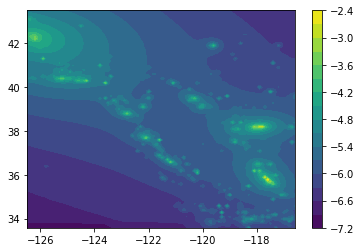

In [210]:
conts = etas.calc_etas_contours()


In [220]:
print('** ', etas.ETAS_array.shape, etas.lonses.shape, etas.latses.shape, etas.)

failed while loading urllib and/or urllib. maybe python 3.x?
comcat not available. consider installing comcat for improved catalog operations; see https://github.com/usgs/libcomcat
**  (10000,) (100,) (100,)


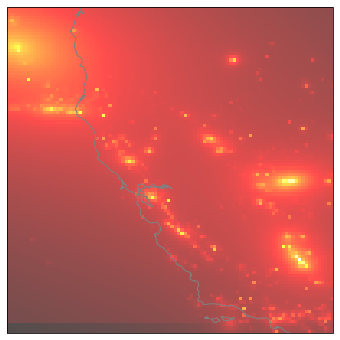

In [226]:
zz = etas.draw_map()
zz.imshow(numpy.log10(etas.lattice_sites), extent=numpy.ravel([etas.lons, etas.lats]),
          alpha=.7, origin='lower', cmap='hot')


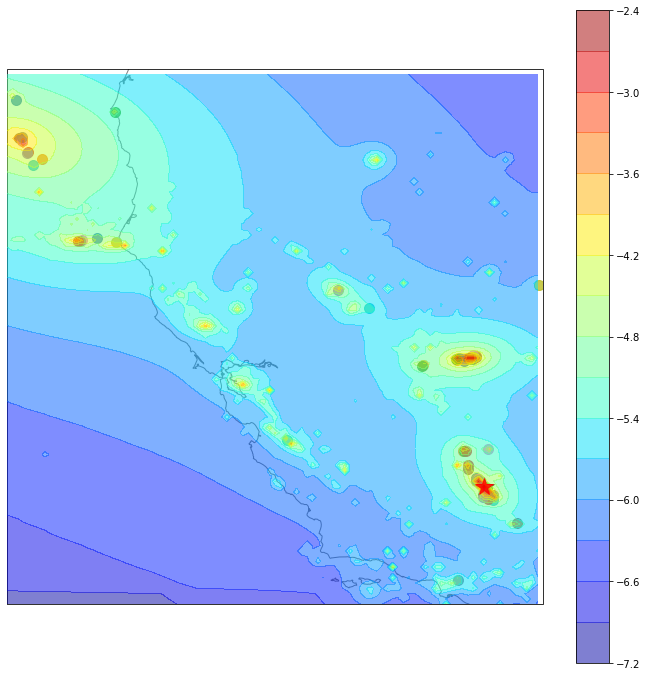

In [212]:
#fg = plt.figure(figsize=(12,12))

#ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude = lon0) )

zzz = etas.make_etas_contour_map(fig_size=(12,12))
zzz = etas.plot_mainshock_and_aftershocks(ax = zzz, m0=4.5)

#zzz.plot([-122, -114], [35, 42], ls='-', lw=4, transform=etas.map_projection)



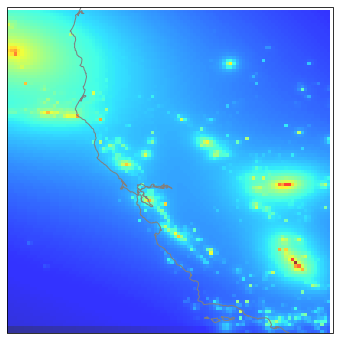

In [213]:
zb = etas.make_etas_boxy_map()
#zb.set_global()
#zb.add_patch(mpl.patches.Rectangle(xy=[-122., 35.], width=4., height=4., facecolor='blue'))

In [214]:
#print('** ', zb.projection)

In [215]:
print('*** ', etas.lonses[0:5])
print('** **: ', etas.ETAS_array.shape, etas.ETAS_array.dtype)

***  [-126.4944 -126.3944 -126.2944 -126.1944 -126.0944]
** **:  (10000,) (numpy.record, [('x', '>f8'), ('y', '>f8'), ('z', '>f8')])


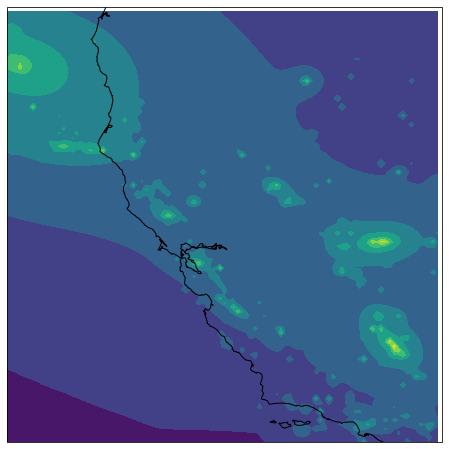

In [216]:
fg = plt.figure(figsize=(10,8))
lon0 = numpy.mean(etas.lonses)
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude = lon0) )
ax.set_extent(numpy.ravel([etas.lons, etas.lats]))
#ax.set_global()
ax.coastlines()
#etas.draw_map(ax=ax)
ax.contourf(etas.lonses-lon0, etas.latses, numpy.log10(etas.lattice_sites), 
            transform=cartopy.crs.PlateCarree(central_longitude = numpy.mean(etas.lonses)) )



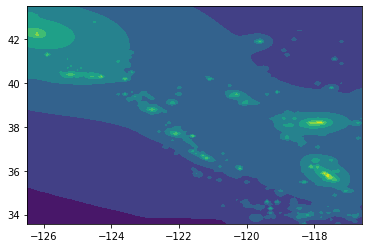

In [217]:
fg = plt.figure()
ax = plt.gca()
#ax.set_extent(numpy.ravel([etas.lons, etas.lats]))
#ax.coastlines()
#etas.draw_map(ax=ax)
ax.contourf(etas.lonses, etas.latses, numpy.log10(etas.lattice_sites) )

In [218]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt



lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

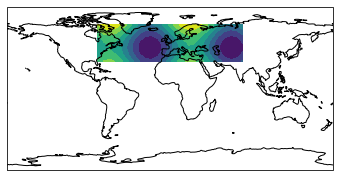

In [219]:


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, but looks ok...
plt.show()